In [51]:
!pip install pandas

In [52]:
import pandas as pd

In [53]:
import matplotlib.pyplot as plt

In [54]:
import numpy as np

In [55]:
import altair as alt

In [56]:
df = pd.read_csv(r'C:\Users\User\OneDrive\BMI population distribution2.csv') 

In [57]:
# Convert cardio_condition to boolean
df['cardio_condition'] = df['cardio_condition'].apply(lambda x: True if x == 1 else False)

In [58]:
# Convert bmi_ranking to text (standard categories)
# Define the mapping
mapping = {
    1: 'underweight',
    2: 'healthy weight',
    3: 'overweight',
    4: 'obese',
    5: 'severely obese'
}

# Apply the mapping
df['bmi_ranking'] = df['bmi_ranking'].map(mapping)

In [59]:
print(df.head())

      sex  age_in_years  body_mass_index  bmi_ranking  cardio_condition
0    male         49.97            18.12  underweight             False
1  female         52.00            17.72  underweight             False
2  female         55.57            18.20  underweight              True
3  female         62.44            18.13  underweight             False
4  female         52.22            18.07  underweight             False


In [60]:
df_sorted_asc = df.sort_values('age_in_years')


In [61]:
print(len(df))

70000


In [62]:
# Calculate the min age
min_age = df['age_in_years'].min()

# Calculate the max age
max_age = df['age_in_years'].max()

# Calculate the mean age
mean_age = df['age_in_years'].mean()

# Calculate the median age
median_age = df['age_in_years'].median()

print(f"Min Age: {min_age}")
print(f"Mean Age: {mean_age}")
print(f"Max Age: {max_age}")
print(f"Median Age: {median_age}")

Min Age: 29.56
Mean Age: 53.30286928571428
Max Age: 64.92
Median Age: 53.94


In [63]:

# Calculate age frequencies by sex
age_counts = df.groupby(['sex', 'age_in_years']).size().reset_index(name='agefrequency')

# Create a histogram using Altair
chart = alt.Chart(age_counts).mark_bar().encode(
    x=alt.X('age_in_years', bin=True, title='Age'),
    y=alt.Y('agefrequency', title='Frequency'),
    color='sex',
    tooltip=['age_in_years', 'agefrequency', 'sex']
).properties(
    title='Age Distribution Histogram by Sex'
).interactive()

# Save the chart
chart.save('distribution_of_age_by_sex.json')

# Display the chart
chart.show() 

alt.Chart(...)

In [64]:
# Count the frequency of each BMI rank/category
bmisexgroup_counts = df.groupby(['cardio_condition', 'sex'])['bmi_ranking'].value_counts().unstack(fill_value=0)
bmigroup_counts = df.groupby('cardio_condition')['bmi_ranking'].value_counts().unstack(fill_value=0)
bmicategory_counts = df['bmi_ranking'].value_counts()
bmicategory_counts.columns = ['bmi_ranking', 'frequency']

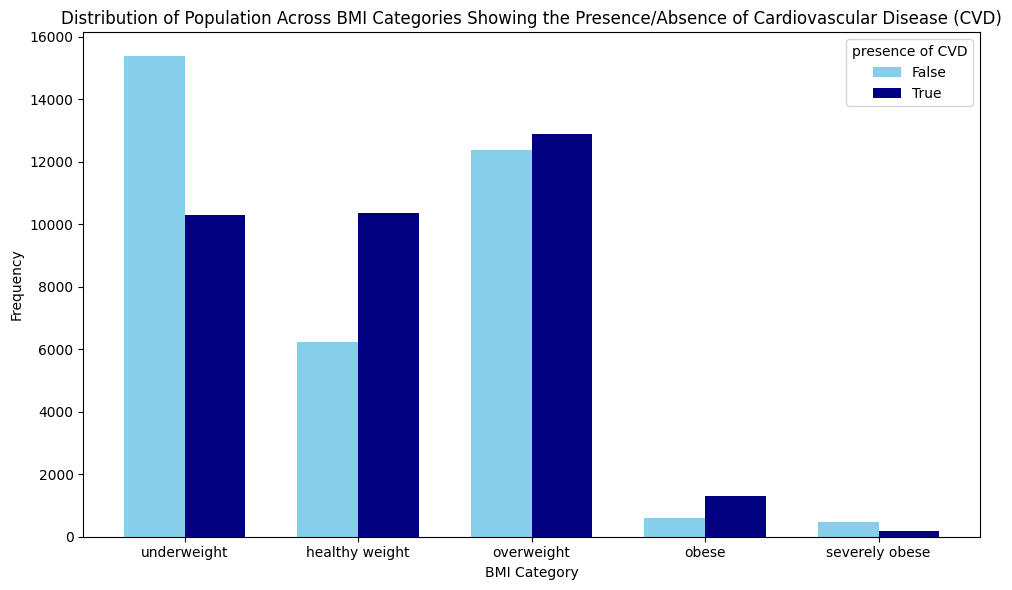

<Figure size 640x480 with 0 Axes>

In [66]:
# Generate sample data
np.random.seed(0)  # For reproducibility
bmi_ranks = ['underweight', 'healthy weight', 'overweight', 'obese', 'severely obese']
data = {
    'bmi_ranking': np.random.choice(bmi_ranks, size=70000),
    'cardio_condition': np.random.choice([True, False], size=70000)
}
df = pd.DataFrame(data)

# Create a bar chart showing the population distribution across the BMI categories taking into consideration, the presence/absence of CVD
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35

x=np.arange(len(bmi_ranks))

# Bars for when cardio_condition is absent/False
rects1 = ax.bar(x - width/2, bmigroup_counts.loc[False], width, label='False', color='skyblue')
# Bars for when cardio_condition is present/True
rects1 = ax.bar(x + width/2, bmigroup_counts.loc[True], width, label='True', color='navy')
                
#Set chart title and labels
ax.set_title('Distribution of Population Across BMI Categories Showing the Presence/Absence of Cardiovascular Disease (CVD)')
ax.set_xlabel('BMI Category')
ax.set_ylabel('Frequency')
ax.set_xticks(x)
ax.set_xticklabels(bmi_ranks)
ax.legend(title = 'presence of CVD')

# Display the plot
plt.tight_layout()
plt.show()

# Save the plot as a PNG image
plt.savefig('BMIcategory_distribution_bar_chart.png')






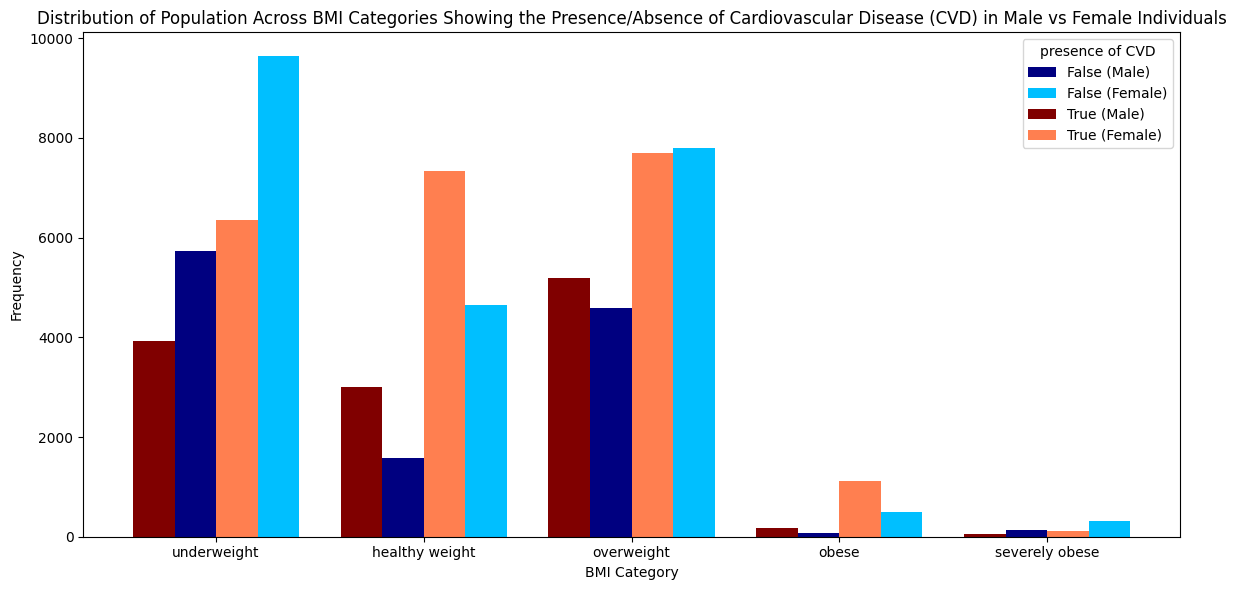

<Figure size 640x480 with 0 Axes>

In [67]:
# Generate sample data
np.random.seed(0)  # For reproducibility
bmi_ranks = ['underweight', 'healthy weight', 'overweight', 'obese', 'severely obese']
data = {
    'bmi_ranking': np.random.choice(bmi_ranks, size=70000),
    'cardio_condition': np.random.choice([True, False], size=70000),
     'sex': np.random.choice(['male', 'female'], size=70000)
}
df = pd.DataFrame(data)


# Create a bar chart showing the population distribution across the BMI categories taking into consideration, the presence/absence of CVD
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2

x=np.arange(len(bmi_ranks))
x_malet = x - width*1.5  # Positions for 'male/true' bars
x_malef = x - width/2   # Positions for 'male/False' bars
x_femalet = x + width/2  # Positions for 'female/true' bars
x_femalef = x + width*1.5  # Positions for 'female/False' bars

# Bars for when cardio_condition is absent/False and individual is male
rects1_male = ax.bar(x_malef, bmisexgroup_counts.loc[False, 'male'], width, label='False (Male)', color='navy')
# Bars for when cardio_condition is absent/False and individual is female
rects2_female = ax.bar(x_femalef, bmisexgroup_counts.loc[False, 'female'], width, label='False (Female)', color='deepskyblue')
# Bars for when cardio_condition is present/True and individual is male
rects3_male = ax.bar(x_malet, bmisexgroup_counts.loc[True, 'male'], width, label='True (Male)', color='maroon')
# Bars for when cardio_condition is present/True and individual is female
rects4_female = ax.bar(x_femalet, bmisexgroup_counts.loc[True, 'female'], width, label='True (Female)', color='coral')

#Set chart title and labels
ax.set_title('Distribution of Population Across BMI Categories Showing the Presence/Absence of Cardiovascular Disease (CVD) in Male vs Female Individuals')
ax.set_xlabel('BMI Category')
ax.set_ylabel('Frequency')
ax.set_xticks(x)
ax.set_xticklabels(bmi_ranks)
ax.legend(title = 'presence of CVD')


# Display the plot
plt.tight_layout()
plt.show()

# Save the plot as a PNG image
plt.savefig('BMIcategory_distribution_male_vs_female_bar_chart.png')